In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import pylab 
from sklearn import preprocessing

In [2]:
df=pd.read_csv('D:/UIUC/IE517 machine learning/week3/homework/HY_Universe_corporate bond.csv')

In [3]:
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [4]:
#show all the columns that have Nan
for i in df.columns:
    if 'Nan'in df[i].tolist():
        print(i)

1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Months in JNK
Months in HYG
Months in Both


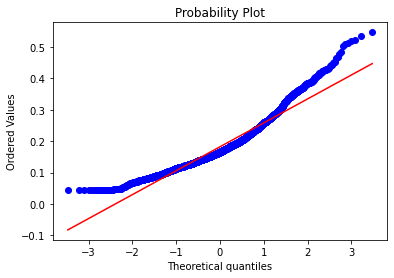

In [5]:
#QQ Plot
stats.probplot(df['LIQ SCORE'],dist='norm',plot=pylab)
pylab.show()

In [6]:
df.columns.values

array(['CUSIP', 'Ticker', 'Issue Date', 'Maturity', '1st Call Date',
       'Moodys', 'S_and_P', 'Fitch', 'Bloomberg Composite Rating',
       'Coupon', 'Issued Amount', 'Maturity Type', 'Coupon Type',
       'Maturity At Issue months', 'Industry', 'LiquidityScore',
       'Months in JNK', 'Months in HYG', 'Months in Both', 'IN_ETF',
       'LIQ SCORE', 'n_trades', 'volume_trades', 'total_median_size',
       'total_mean_size', 'n_days_trade', 'days_diff_max',
       'percent_intra_dealer', 'percent_uncapped', 'bond_type',
       'Client_Trade_Percentage', 'weekly_mean_volume',
       'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume',
       'weekly_mean_ntrades', 'weekly_median_ntrades'], dtype=object)

In [7]:
#Standardization
x=df.iloc[:,20:30]
scaler=preprocessing.StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler_df=pd.DataFrame(x_scaler)

In [8]:
#print heatmap
#calculate correlation metrix
corMat=pd.DataFrame(x_scaler_df.corr())
print(corMat)

          0         1         2         3         4         5         6  \
0  1.000000  0.803139  0.786718 -0.627008 -0.656980  0.873040  0.717280   
1  0.803139  1.000000  0.769322 -0.425801 -0.468673  0.704310  0.497633   
2  0.786718  0.769322  1.000000 -0.276204 -0.278564  0.772564  0.540932   
3 -0.627008 -0.425801 -0.276204  1.000000  0.930213 -0.490428 -0.425033   
4 -0.656980 -0.468673 -0.278564  0.930213  1.000000 -0.494483 -0.430947   
5  0.873040  0.704310  0.772564 -0.490428 -0.494483  1.000000  0.796236   
6  0.717280  0.497633  0.540932 -0.425033 -0.430947  0.796236  1.000000   
7  0.671903  0.415695  0.387555 -0.650101 -0.679317  0.500944  0.386251   
8  0.666321  0.396880  0.241814 -0.826443 -0.862401  0.433119  0.369973   
9 -0.368492 -0.208283 -0.452584  0.081332  0.086759 -0.444068 -0.244259   

          7         8         9  
0  0.671903  0.666321 -0.368492  
1  0.415695  0.396880 -0.208283  
2  0.387555  0.241814 -0.452584  
3 -0.650101 -0.826443  0.081332  
4 -0

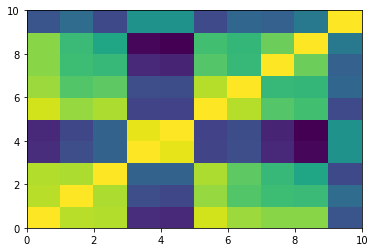

In [9]:
plt.pcolor(corMat)
plt.show()

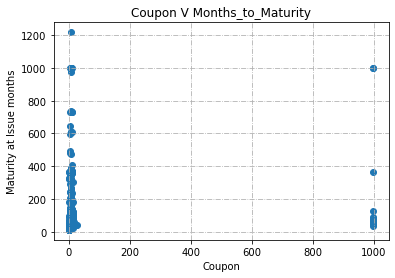

In [10]:
#Scatter plot1
plt.grid(True,linestyle='-.')
plt.xlabel('Coupon')
plt.ylabel('Maturity at Issue months')
plt.title('Coupon V Months_to_Maturity')
_=plt.scatter(df['Coupon'],df['Maturity At Issue months'])

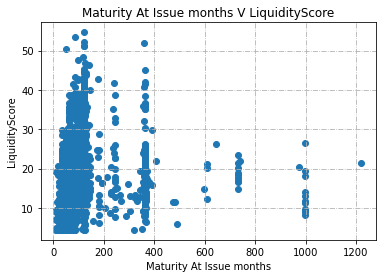

In [11]:
#Scatter plot2
plt.grid(True,linestyle='-.')
plt.xlabel('Maturity At Issue months')
plt.ylabel('LiquidityScore')
plt.title('Maturity At Issue months V LiquidityScore')
_=plt.scatter(df['Maturity At Issue months'],df['LiquidityScore'])

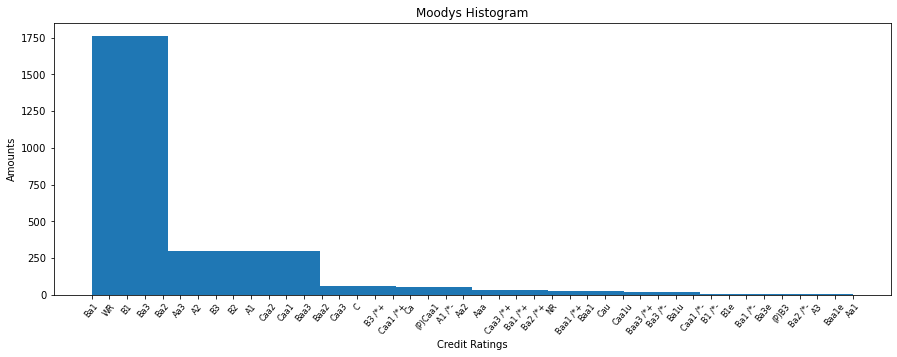

In [12]:
#Histogram
moodys=df['Moodys'][-df['Moodys'].isin(['Nan'])]
plt.figure(figsize=(15,5))
plt.xlabel('Credit Ratings')
plt.ylabel('Amounts')
plt.title('Moodys Histogram')
plt.xticks(fontsize=8,rotation=50)
_=plt.hist(moodys)

In [13]:
summary=df.describe()

In [14]:
print(summary)

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

4
5
7
8


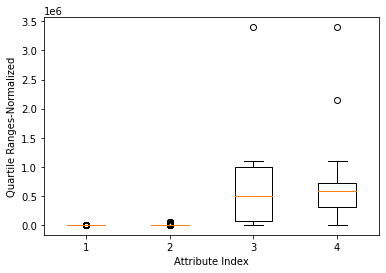

In [15]:
dfNormalized=df.iloc[:,[20,21,23,24]]
l = [4,5,7,8]
for i in l:
    mean=summary.iloc[1,i]
    sd=summary.iloc[2,i]
    dfNormalized.iloc[:,i:(i+1)]=(dfNormalized.iloc[:,i:(i+1)]-mean)/sd
    print(i)
array=dfNormalized.values
plt.boxplot(array)
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges-Normalized"))
plt.show()

In [18]:
print("My name is Chenxiang Zhang and you can call me Franklin")
print("My NetID is:cz52")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Chenxiang Zhang and you can call me Franklin
My NetID is:cz52
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
